# Recuperacion Modulo 5
 
**Autor:** Daniel Carrera Bonilla

**Fecha:** 11 de Julio de 2024


### 1. Carga de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap
import h2o
from h2o.automl import H2OAutoML


Se carga el dataset que contiene información sobre viviendas en Melbourne. Esta visualización inicial ayuda a entender la estructura de los datos y las primeras filas del dataset.

In [3]:
# Carga de datos
data = pd.read_csv("datos_casas_melbourne.csv")

# Visualización inicial de los datos
data.head()

,Rooms,Type,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Regionname,Propertycount,Price
0,2,h,2,1,202,-37.7996,144.9984,'Northern Metropolitan',4019,1480000
1,2,h,2,1,156,-37.8079,144.9934,'Northern Metropolitan',4019,1035000
2,3,h,3,2,134,-37.8093,144.9944,'Northern Metropolitan',4019,1465000
3,3,h,3,2,94,-37.7969,144.9969,'Northern Metropolitan',4019,850000
4,4,h,3,1,120,-37.8072,144.9941,'Northern Metropolitan',4019,1600000


### 2. Información general del dataset
Se obtiene información general del dataset, como el tipo de datos de cada columna y la cantidad de valores no nulos. Esto es importante para identificar posibles problemas como valores faltantes:

In [4]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Type           13580 non-null  object 
 2   Bedroom2       13580 non-null  int64  
 3   Bathroom       13580 non-null  int64  
 4   Landsize       13580 non-null  int64  
 5   Lattitude      13580 non-null  float64
 6   Longtitude     13580 non-null  float64
 7   Regionname     13580 non-null  object 
 8   Propertycount  13580 non-null  int64  
 9   Price          13580 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### 3. Estadísticas Descriptivas del Dataset
Las  estadísticas descriptivas proporcionan una visión general de la distribución de los datos, como la media, la desviación estándar, y los percentiles. Esto ayudaa a identificar posibles valores atípicos y entender la escala de los datos:

In [5]:
# Estadísticas descriptivas del dataset
data.describe()


,Rooms,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount,Price
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,1.358000e+04
mean,2.937997,2.914728,1.534242,558.416127,-37.809203,144.995216,7454.417378,1.075684e+06
std,0.955748,0.965921,0.691712,3990.669241,0.079260,0.103916,4378.581772,6.393107e+05
min,1.000000,0.000000,0.000000,0.000000,-38.182550,144.431810,249.000000,8.500000e+04
25%,2.000000,2.000000,1.000000,177.000000,-37.856822,144.929600,4380.000000,6.500000e+05
50%,3.000000,3.000000,1.000000,440.000000,-37.802355,145.000100,6555.000000,9.030000e+05
75%,3.000000,3.000000,2.000000,651.000000,-37.756400,145.058305,10331.000000,1.330000e+06
max,10.000000,20.000000,8.000000,433014.000000,-37.408530,145.526350,21650.000000,9.000000e+06


### 4. Histograma de Variables Numéricas

Se visualizan los histogramas de las variables numéricas para entender su distribución. Esto es útil para identificar distribuciones sesgadas o valores extremos:

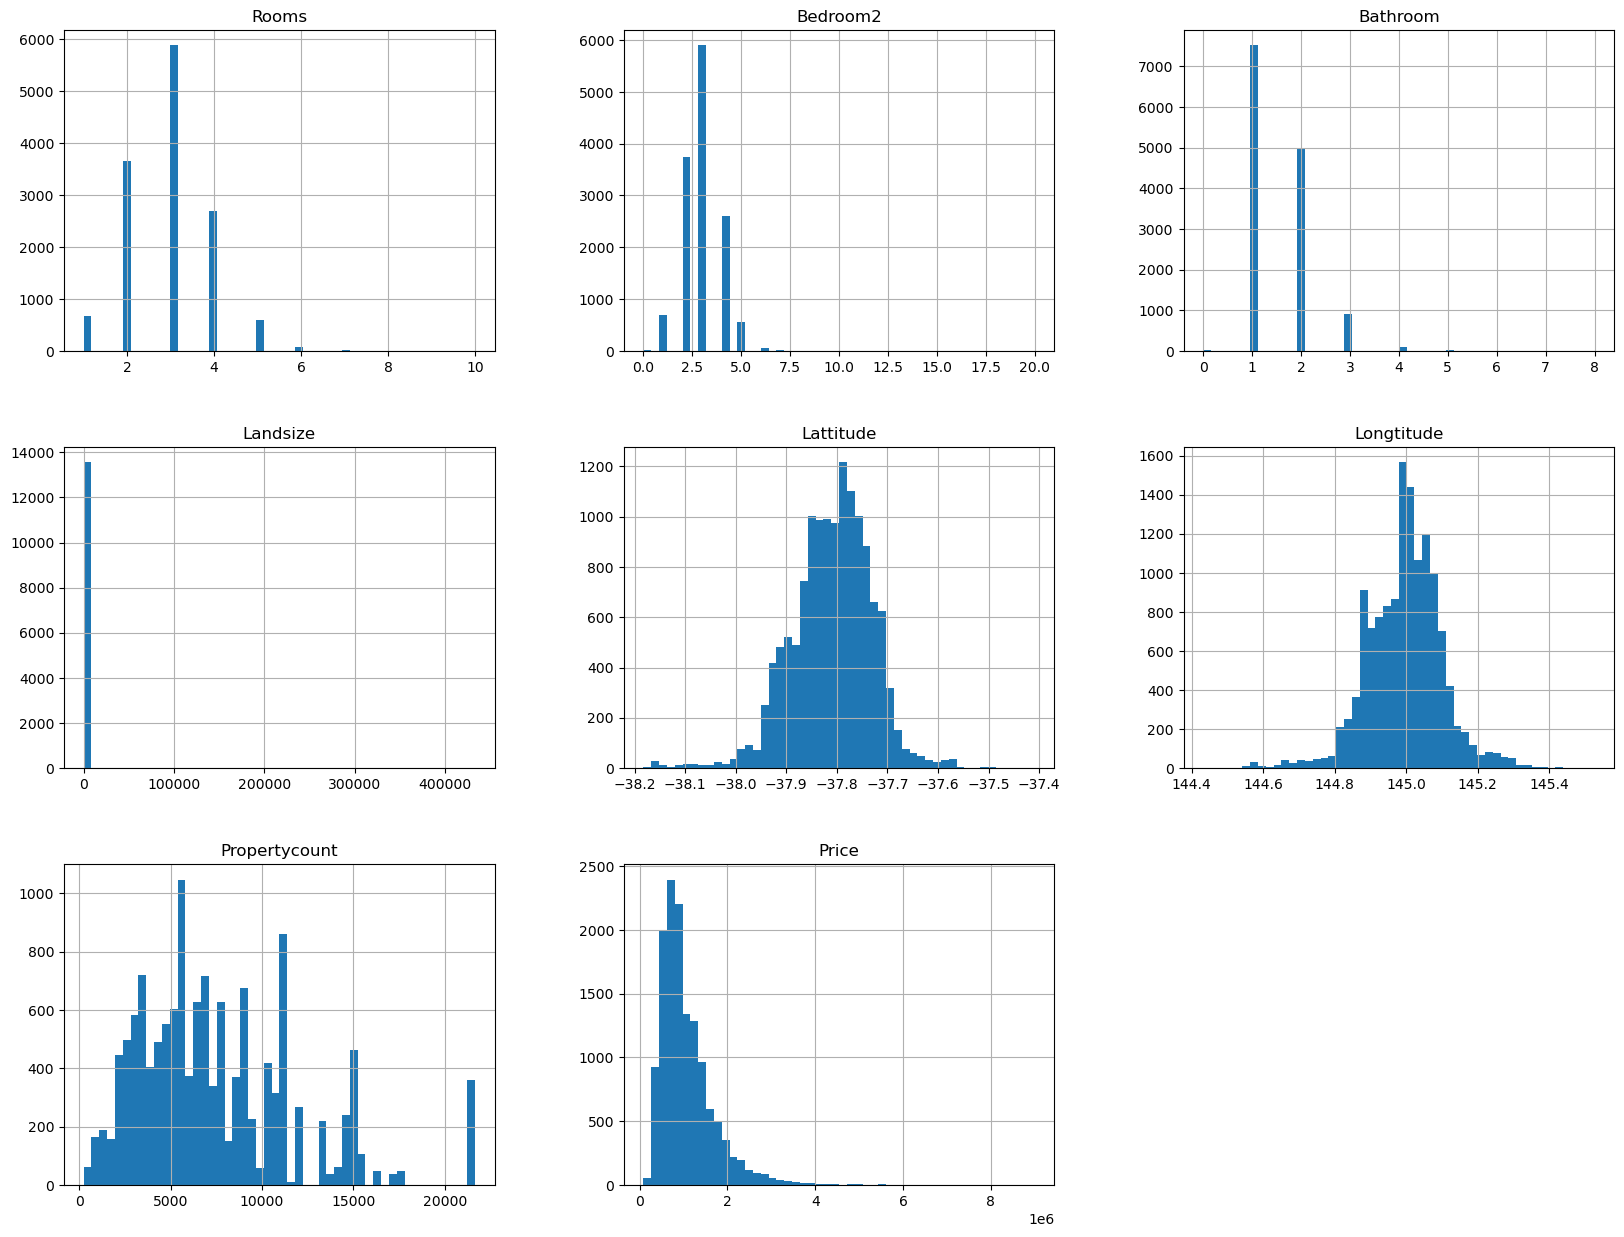

In [6]:
# Histograma de variables numéricas
data.hist(bins=50, figsize=(20,15))
plt.show()


 

1. **Rooms (Habitaciones)**: La mayoría de las propiedades tienen entre 2 y 4 habitaciones, con un pico claro en 3 habitaciones. Hay muy pocas propiedades con más de 6 habitaciones.

2. **Bedroom2 (Habitaciones secundarias)**: Similar a las habitaciones, la mayoría de las propiedades tienen entre 2 y 3 habitaciones secundarias, con un pequeño número que tiene más de 6.

3. **Bathroom (Baños)**: La mayoría de las propiedades tienen 1 o 2 baños, con muy pocas propiedades que tienen más de 3 baños.

4. **Landsize (Tamaño del terreno)**: La distribución está altamente sesgada a la derecha, lo que indica que la mayoría de los terrenos son pequeños, pero hay algunos terrenos excepcionalmente grandes que influyen en la distribución.

5. **Latitude (Latitud)**: La distribución es aproximadamente normal, centrada alrededor de -37.8 grados de latitud.

6. **Longitude (Longitud)**: La distribución también es aproximadamente normal, centrada alrededor de 145 grados de longitud.

7. **Propertycount (Número de propiedades)**: La mayoría de las áreas tienen menos de 5000 propiedades, pero algunas áreas tienen más de 20000 propiedades, lo que sugiere una gran variabilidad en la densidad de propiedades.

8. **Price (Precio)**: La distribución está altamente sesgada a la derecha, indicando que la mayoría de las propiedades tienen precios más bajos, pero hay algunas propiedades con precios extremadamente altos.

 

### 5. Análisis de Correlación

Crearemos una matriz de correlación para las variables numéricas, visualizada con un heatmap. Esto nos ayudará a identificar relaciones lineales entre las variables, crucial para seleccionar características relevantes para los modelos.

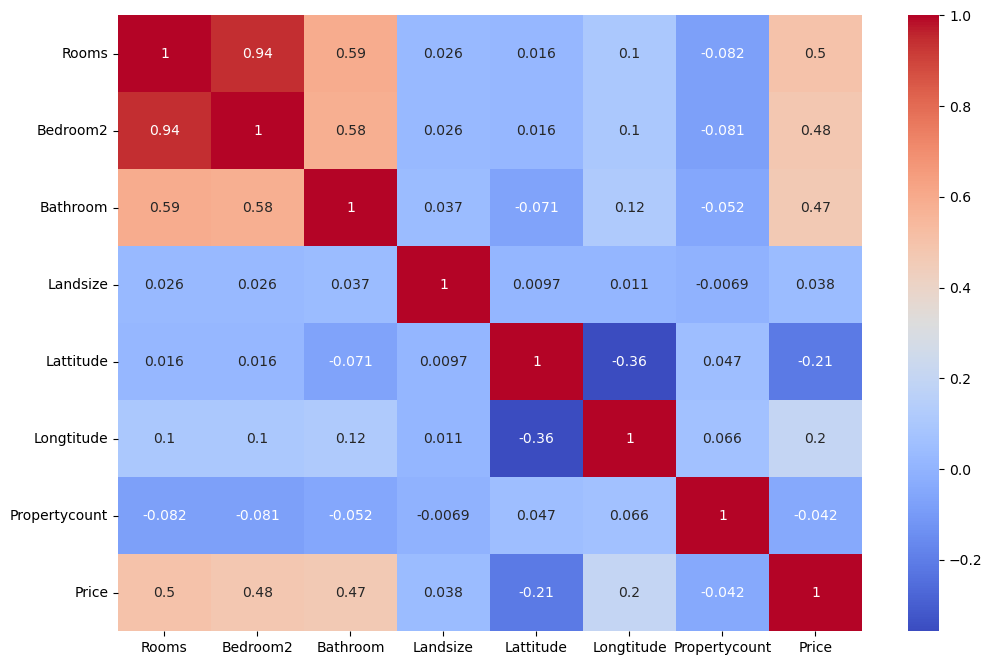

In [7]:
# Filtrar solo las columnas numéricas para el análisis de correlación
numerical_data = data.select_dtypes(include=[np.number])

# Matriz de correlación
corr_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


 
1. **Rooms (Habitaciones)**:
   - Alta correlación positiva con **Bedroom2 (0.94)** y **Bathroom (0.59)**, indicando que a medida que aumenta el número de habitaciones, también tiende a aumentar el número de habitaciones secundarias y baños.
   - Correlación moderada positiva con **Price (0.5)**, sugiriendo que más habitaciones están asociadas con precios más altos.

2. **Bedroom2 (Habitaciones secundarias)**:
   - Alta correlación positiva con **Rooms (0.94)** y **Bathroom (0.58)**, reflejando una relación similar a la mencionada anteriormente.
   - Correlación moderada positiva con **Price (0.48)**, similar a la relación de las habitaciones con el precio.

3. **Bathroom (Baños)**:
   - Alta correlación positiva con **Rooms (0.59)** y **Bedroom2 (0.58)**.
   - Correlación moderada positiva con **Price (0.47)**, indicando que más baños también están asociados con precios más altos.

4. **Landsize (Tamaño del terreno)**:
   - Muy baja correlación con la mayoría de las variables, excepto una ligera correlación positiva con **Price (0.038)**. Esto sugiere que el tamaño del terreno no tiene una relación lineal fuerte con otras variables en este conjunto de datos.

5. **Latitude (Latitud)**:
   - Correlación negativa moderada con **Longitude (-0.36)**, indicando que hay una tendencia a que propiedades en ciertos rangos de latitud estén en rangos opuestos de longitud.
   - Correlación negativa con **Price (-0.21)**, sugiriendo que la latitud puede tener alguna influencia en el precio, posiblemente debido a la ubicación geográfica de las propiedades.

6. **Longitude (Longitud)**:
   - Correlación negativa moderada con **Latitude (-0.36)**.
   - Correlación positiva baja con **Price (0.2)**, indicando que la longitud también puede influir en los precios.

7. **Propertycount (Número de propiedades)**:
   - Muy baja correlación con todas las demás variables, incluyendo **Price (-0.042)**, indicando que el número de propiedades en un área no tiene una relación lineal fuerte con estas variables.

8. **Price (Precio)**:
   - Correlación positiva moderada con **Rooms (0.5)**, **Bedroom2 (0.48)** y **Bathroom (0.47)**, sugiriendo que estas características son importantes al determinar el precio de una propiedad.
   - Correlación negativa con **Latitude (-0.21)**, sugiriendo una posible influencia geográfica en los precios.

En resumen, el heatmap de correlación nos está mostrando que las variables que tienen una relación más fuerte con el precio de la propiedad son el número de habitaciones, habitaciones secundarias y baños. El tamaño del terreno y el número de propiedades no muestran una correlación fuerte con el precio. La latitud y la longitud tienen alguna influencia, aunque no tan fuertee como las variables relacionadas con la cantidad de habitaciones y baños. 

### 6. Preprocesamiento de Datos

Se configura el preprocesamiento para las características numéricas y categóricas. Las características numéricas se imputan con la mediana y se escalan, mientras que las categóricas se imputan con la moda y se codifican con OneHotEncoder. Este paso es crucial para preparar los datos de manera que los modelos puedan procesarlos adecuadamente.

In [8]:
numeric_features = numerical_data.columns.drop('Price')
categorical_features = data.select_dtypes(include=[object]).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### 7. Separación de Características y Variable Objetivo

Separamos las características independientes (X) de la variable objetivo (y), que en este caso es el precio de las viviendas.

In [9]:
X = data.drop('Price', axis=1)
y = data['Price']

### 8. División del Conjunto de Datos en Entrenamiento y Prueba

El dataset se divide en conjuntos de entrenamiento y prueba. El 80% de los datos se utiliza para entrenar los modelos y el 20% para evaluarlos, asegurando que los resultados sean representativos y no estén sobreajustados.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 9. Definición y Entrenamiento de Modelos

Entrenamos varios modelos de regresión utilizando un pipeline que incluye el preprocesador y el modelo. 

Se evalúan los modelos usando métricas como **MSE**, **MAE** y **R2**, y seleccionaremos  el mejor modelo basado en el **R2**, que mide la proporción de la varianza en la variable objetivo que es predecible a partir de las características independientes.

In [11]:
# 10. Definición y entrenamiento de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'Neural Network': MLPRegressor(max_iter=500),
}

results = []
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2})

results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
results_df

/home/delta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.418e+14, tolerance: 4.471e+11
  model = cd_fast.enet_coordinate_descent(
/home/delta/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,MSE,MAE,R2
4,Random Forest,7.372241e+10,169256.164754,0.814401
5,Gradient Boosting,9.797163e+10,203821.395982,0.753353
2,K-Nearest Neighbors,1.080211e+11,204675.910530,0.728053
3,Decision Tree,1.337470e+11,222294.691335,0.663287
1,Lasso,1.947296e+11,312025.778155,0.509761
0,Linear Regression,1.947330e+11,312027.557024,0.509753
6,Support Vector Regressor,4.270044e+11,439003.847334,-0.074999
7,Neural Network,1.029577e+12,854667.821933,-1.591997


### 10. Selección y Explicación del Modelo Óptimo

Seleccionamos el modelo con el mejor rendimiento (mayor R2) y entrenamos nuevamente el pipeline con este modelo utilizando todos los datos de entrenamiento.

Luego usamos **SHAP** para interpretar el modelo seleccionado, proporcionando una visualización de los valores SHAP que muestran la importancia de cada característica en las predicciones. Esto nos ayuda a explicar el modelo de manera comprensible para las partes interesadas del negocio.

IndexError: index 13 is out of bounds for axis 0 with size 9

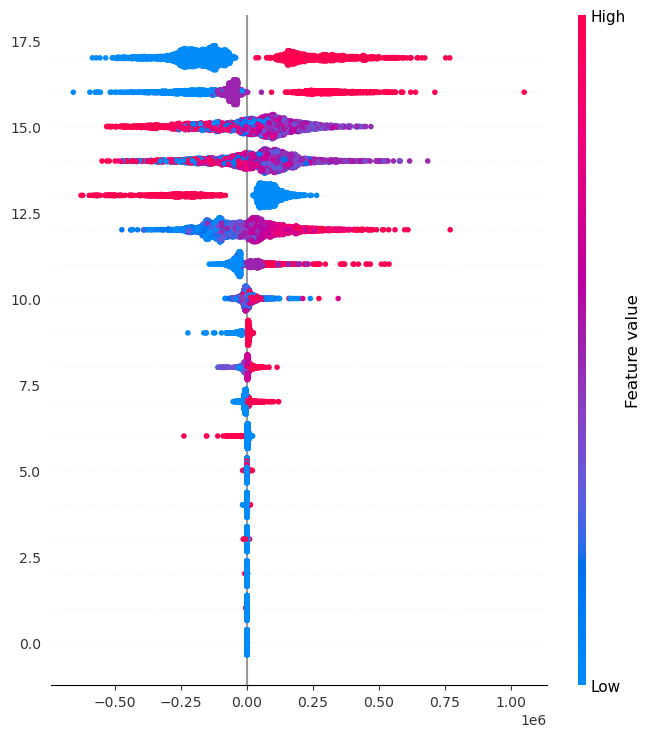

In [15]:
# Obtén el nombre del mejor modelo
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

# Crear y entrenar el pipeline con el mejor modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
pipeline.fit(X_train, y_train)


import joblib

# Guardar el mejor modelo
model_path = "best_model.pkl"
joblib.dump(pipeline, model_path)

# Preprocesar los datos de prueba
X_test_preprocessed = preprocessor.transform(X_test)

# Crear el explicador SHAP específico para árboles
explainer = shap.TreeExplainer(pipeline['model'])
shap_values = explainer.shap_values(X_test_preprocessed)

# Visualización de los valores SHAP
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=X.columns)


### Análisis de la Visualización SHAP

1. **Importancia de las Características**:
   - En el eje vertical, se enumeran las características del modelo, ordenadas por importancia.
   - Cada punto en el gráfico representa un valor SHAP para una muestra particular, mostrando cómo esa característica influyó en la predicción del modelo.
   - Los colores indican el valor de la característica: rojo para valores altos y azul para valores bajos.

2. **Interpretación de los Valores SHAP**:
   - El eje horizontal muestra el impacto de cada característica en la predicción. Los valores positivos incrementan la predicción, mientras que los valores negativos la disminuyen.
   - La dispersión horizontal de los puntos indica la variabilidad en la influencia de la característica sobre diferentes predicciones.

3. **Principales Características**:
   - **La característica en la parte superior** (no identificada explícitamente en el gráfico, pero basada en la interpretación común de estos gráficos, podría ser "Rooms" o "Price") tiene un impacto significativo y variable en las predicciones.
   - Las características subsiguientes también tienen impactos considerables, aunque menores en comparación con la primera. Esto se observa en la menor dispersión horizontal y en la cantidad de puntos más concentrados cerca del centro (0).

4. **Patrones Específicos**:
   - **Valores altos de características** (rojo) suelen estar a la derecha del cero, indicando que incrementan las predicciones del modelo.
   - **Valores bajos de características** (azul) suelen estar a la izquierda del cero, indicando que disminuyen las predicciones del modelo.


Esta visualización SHAP ayuda a entender qué características son más influyentes en el modelo de predicción de precios de propiedades. 

Los resultados indican que algunas características tienen un impacto mucho mayor que otras, y que los valores altos de estas características generalmente incrementan la predicción del precio. 


### 12.Eleccion y uso del mejor modelo, haciendo uso de H2O AutoML: 

1. **Inicio de H2O**: Se inicializa el servidor H2O local.
2. **Conversión de datos**: El dataset de pandas se convierte a un formato H2OFrame, que es compatible con H2O.
3. **División del dataset**: Se divide el dataset en conjuntos de entrenamiento y prueba con una proporción de 80-20.
4. **Definición de características y variable objetivo**: Se seleccionan las columnas que se utilizarán como características y se define la variable objetivo (Price).
5. **Configuración y ejecución de AutoML**: Se configura H2O AutoML para entrenar varios modelos durante un máximo de 3600 segundos (1 hora) con 5 fold cross-validation.
6. **Resultados**: Se muestra el leaderboard con los 10 mejores modelos entrenados por AutoML.
7. **Evaluación del mejor modelo**: Se evalúa el rendimiento del mejor modelo en el conjunto de prueba, proporcionando métricas como MSE, RMSE, MAE, y R2.

 

In [ ]:
# Iniciar H2O
h2o.init()

# Convertir los datos a un frame de H2O
h2o_df = h2o.H2OFrame(data)

# División del dataset en entrenamiento y prueba
train, test = h2o_df.split_frame(ratios=[0.8])

# Definir características y variable objetivo
x = train.columns
y = 'Price'
x.remove(y)

# Configuración de AutoML
aml = H2OAutoML(max_runtime_secs=3600, seed=42, nfolds=5)
aml.train(x=x, y=y, training_frame=train)

# Resultados del AutoML
lb = aml.leaderboard
print(lb.head(rows=10))

# Evaluación del mejor modelo
best_model = aml.leader
perf = best_model.model_performance(test)
print(perf)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu120.04.2); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu120.04.2, mixed mode, sharing)
  Starting server from /home/delta/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_bnz0q7l
  JVM stdout: /tmp/tmp_bnz0q7l/h2o_delta_started_from_python.out
  JVM stderr: /tmp/tmp_bnz0q7l/h2o_delta_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,4 hours and 56 minutes
H2O_cluster_name:,H2O_from_python_delta_hc60yk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.791 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                  rmse          mse     mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_4_AutoML_1_20240710_10728     279724  7.82455e+10  162519  0.196401               7.82455e+10
StackedEnsemble_AllModels_6_AutoML_1_20240710_10728     279833  7.83065e+10  162613  0.196145               7.83065e+10
StackedEnsemble_Best1000_1_AutoML_1_20240710_10728      280636  7.87566e+10  163154  0.196788               7.87566e+10
StackedEnsemble_AllModels_3_AutoML_1_20240710_10728     280901  7.89052e+10  162923  0.196955               7.89052e+10
StackedEnsemble_BestOfFamily_4_AutoML_1_20240710_10728  282242  7.96604e+10  164578  0.198931               7.96604e+10
StackedEnsemble_BestOfFamily_7_AutoML_1_20240710_10728  282281  7.96828e+10  164077  0.198

## 13.Interpretacion final de los resultados del modelo entrenado

Por último, en un archivo externo llamado 'flask-api.py', hemos creado el siguiente script con python con el que, mediante el uso del microframework **FLASK** y el mejor modelo generado en el paso anterior, tras un entrenamiento de 59 minutos, creamos una API con la que poder acceder a los resulados.

Código:
```python
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Cargar el modelo
model_path = "best_model.pkl"
model = joblib.load(model_path)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    data_df = pd.DataFrame(data)
    prediction = model.predict(data_df)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(port=5000, debug=True)

```

Ejemplo uso de llamada al endpoint de la API:
`curl -X POST -H "Content-Type: application/json" -d '{"Rooms": [3], "Type": ["h"], "Bedroom2": [2], "Bathroom": [1], "Landsize": [156], "Lattitude": [-37.8079], "Longtitude": [144.9934], "Regionname": ["Northern Metropolitan"], "Propertycount": [4019]}' http://127.0.0.1:5000/predict
`

Resultado:
```bash
{
  "prediction": [
    1165880.0
  ]
}
```

Esto significa que el modelo predictivo ha estimado que el precio de la vivienda, basado en las características proporcionadas en la solicitud, es de aproximadamente 1,165,880 dólares.
